# Prediksi Produktivitas Buruh Pada Perusahaan Pakaian [Regresi]

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection       import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neural_network        import MLPRegressor
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model          import LinearRegression
from sklearn.neighbors             import KNeighborsRegressor
from sklearn.ensemble              import RandomForestRegressor
from sklearn.metrics               import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree                  import DecisionTreeRegressor
from sklearn.svm                   import SVR
from pyforest                      import *

In [3]:
df = pd.read_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/garments_worker_productivity.csv')

<IPython.core.display.Javascript object>

In [4]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


#### Struktur Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### Dimensi data

In [6]:
df.shape

(1197, 15)

11197 record data serta 15 variabel

#### Missing value

In [7]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [9]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Solusi untuk 500 record data yang mengalami missing value tersebut tidak bisa aku isi dengan 0 atau menghapus kolomnya, karena 50% data mengalami missing value. Solusinya mungkin bisa diisi dengan mean atau rata-rata.

In [10]:
df['wip'].fillna(df['wip'].mean(), inplace=True)

In [11]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [12]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [13]:
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [14]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [15]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [16]:
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [17]:
df['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64

In [18]:
df['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

Variabel-variabel kategorikal diatas nantinya akan diterapkan encoding:
- `day`: tidak memiliki urutan maka One-Hot Encoding akan cocok.
- `quarter`: memiliki urutan atau tingkatan (Quarter1, Quarter2, dll.) mungkin ordinal Encoding bisa digunakan.
- `department`: label encoding karena jika diterapkan onehot akan terlalu banyak fitur

In [19]:
df2 = df.drop(['date'], axis=1)

In [20]:
df2.head(5)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [21]:
df2.shape

(1197, 14)

### Outlier
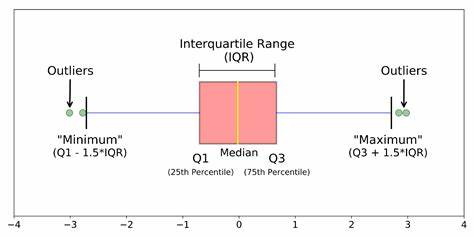

#### menentukan variabel yang kategorikal dan numerik

In [22]:
objek_vars           = []
numerik_vars         = []

for col in df2.columns:
    
    if df2[col].dtype == 'object':
        objek_vars.append(col)
        
    else:
        numerik_vars.append(col)

#### membuat visualisasi boxplot untuk melihat outlier dan mengantisipasi variasi data yang tinggi

In [23]:
df3                = df2.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

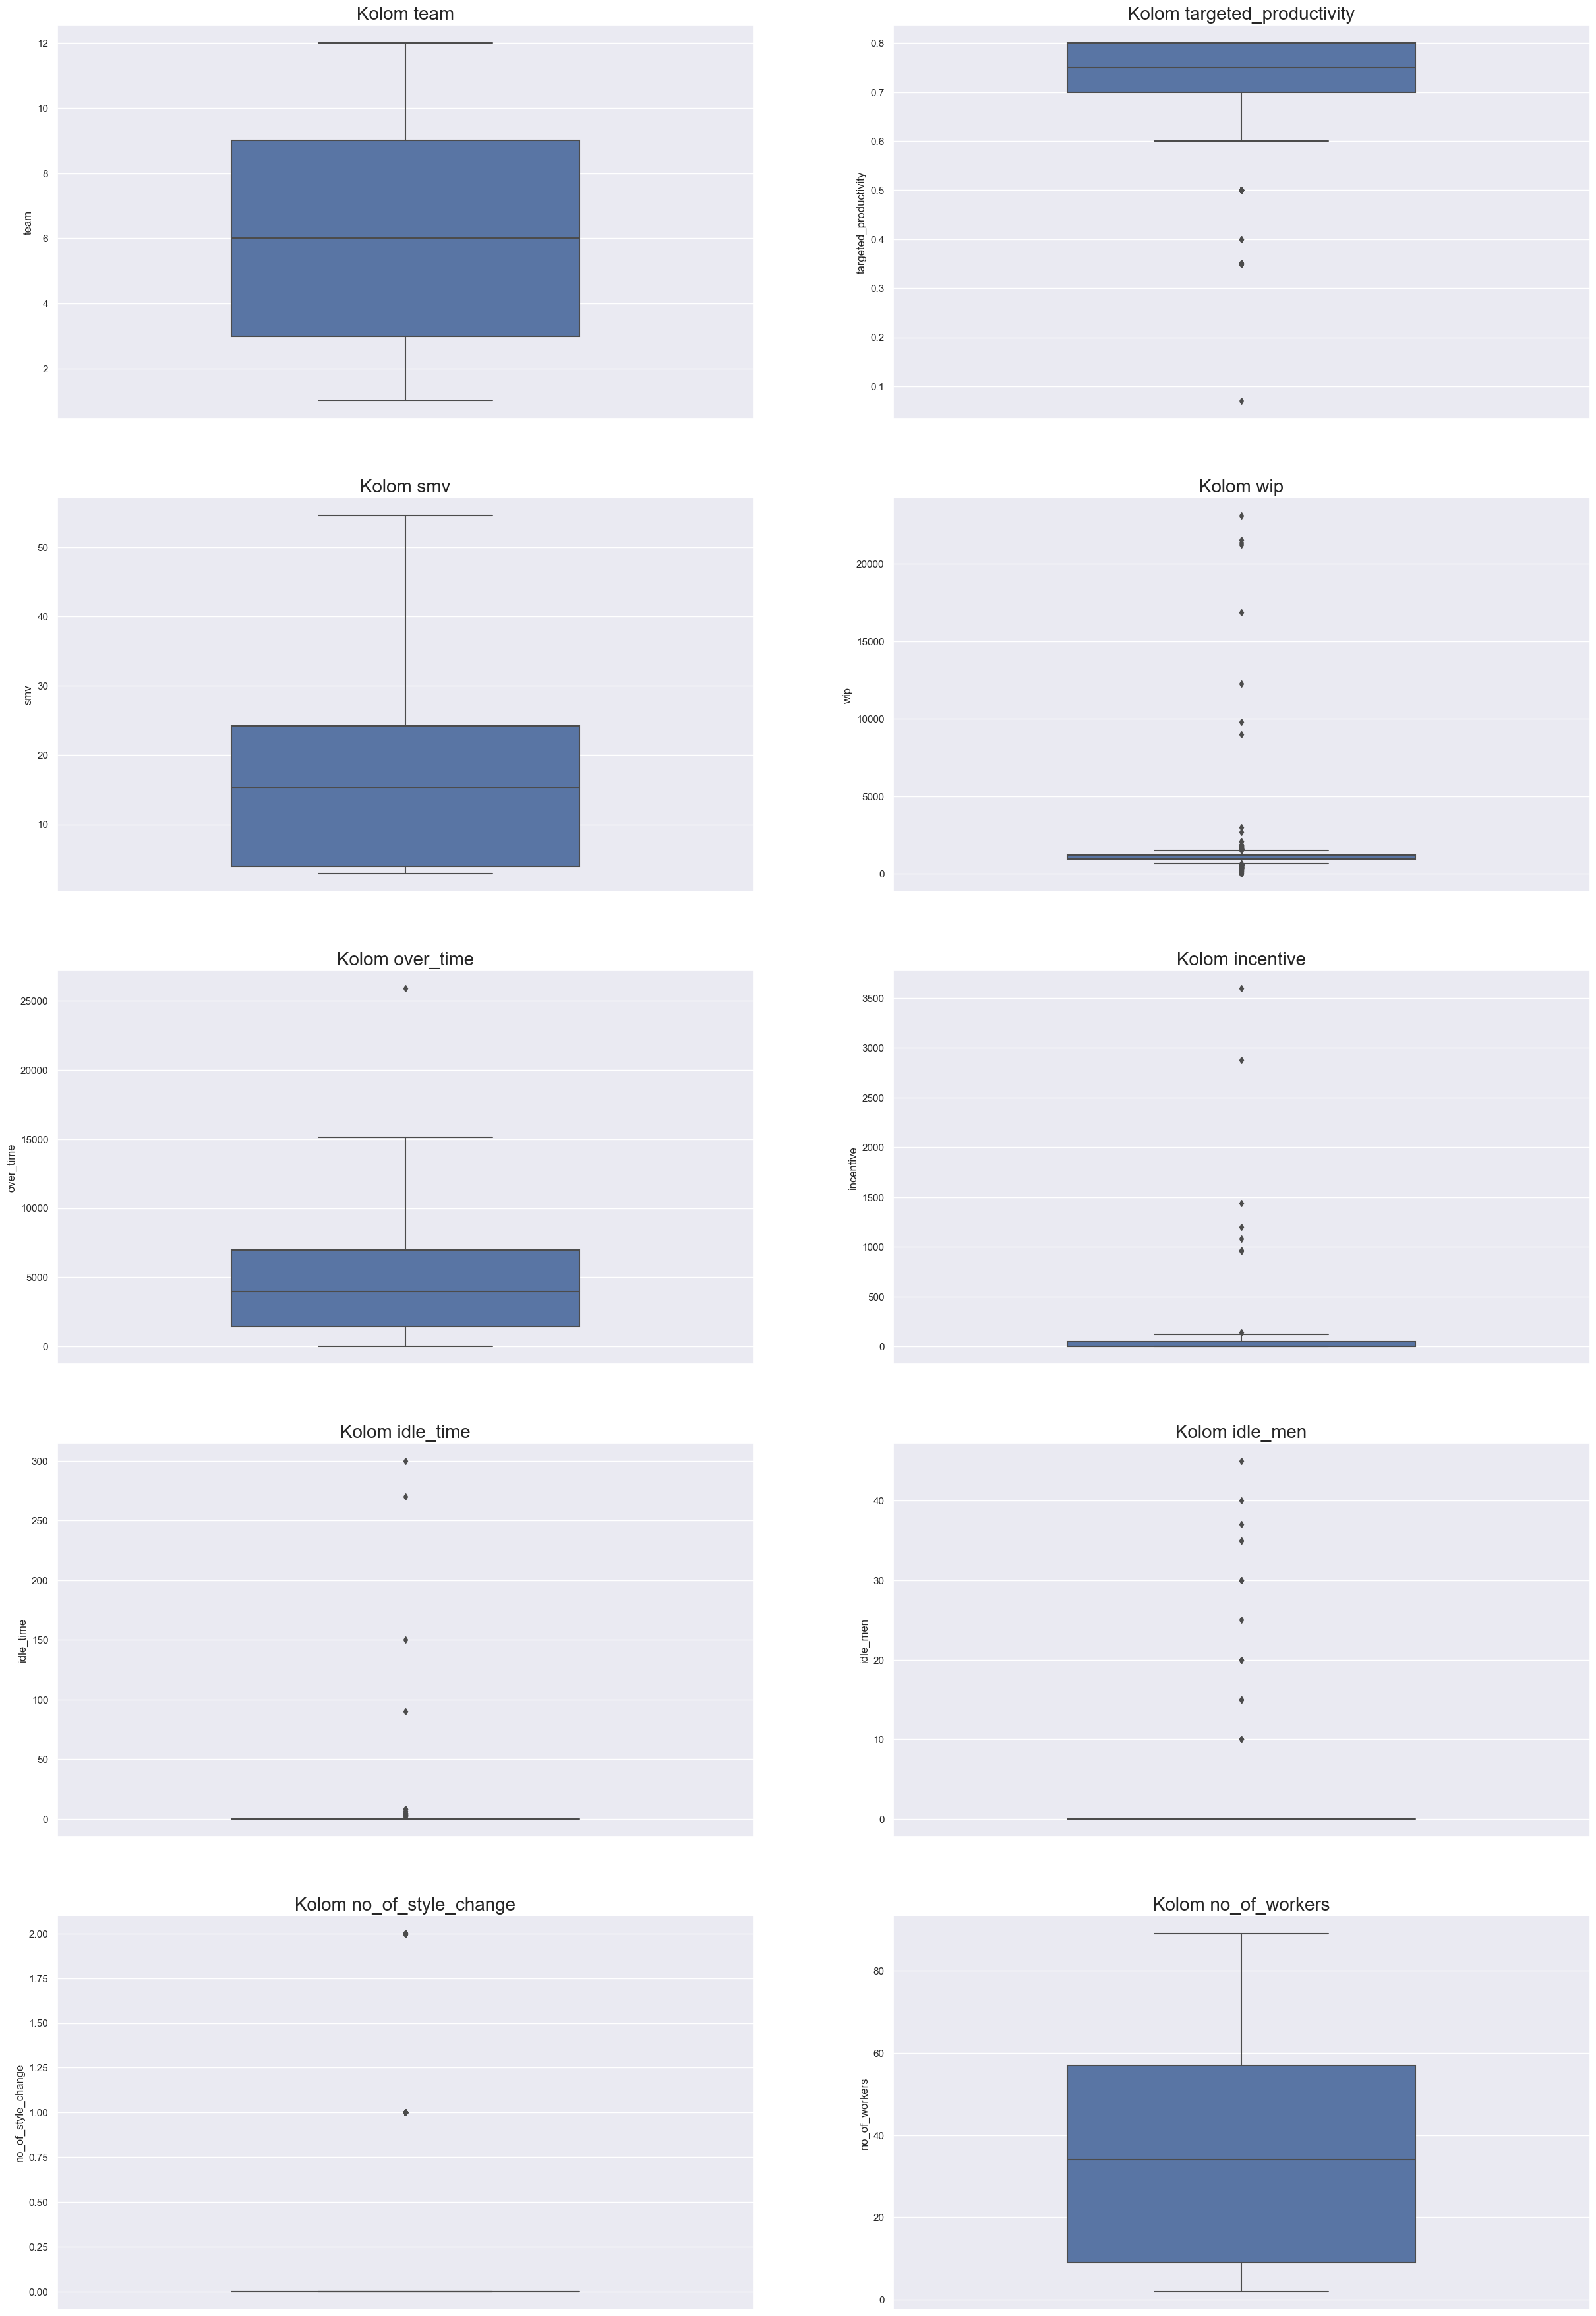

In [24]:
num                = df3[numerik_vars]
n                  = len(num.columns)
rows               = n // 2
cols               = 2
sns.set(font_scale = 1)
fig, ax            = plt.subplots(rows, cols, figsize=(30, 45))

for i in range(rows):
    
    for j in range(cols):
        
        index      = i * cols + j
        if index   < n:
            col    = num.columns[index]
            sns.boxplot(ax=ax[i, j],
                        data=num,
                        y=num[col],
                        width=0.50)
            
            ax[i, j].set_title(f'Kolom {col}', fontdict={'fontsize': 20})

In [25]:
df3.shape

(1197, 14)

### Handling Outlier
Variabel yang merupakan outlier dan harus dihandle:
- target_productivity
- incentive
- wip
- over_time

In [26]:
def handle_outlier(df, variabel):
    Q1          = df[variabel].quantile(0.25)
    Q3          = df[variabel].quantile(0.75)
    IQR         = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df.loc[df[variabel] > upper_limit, variabel] = upper_limit
    df.loc[df[variabel] < lower_limit, variabel] = lower_limit

    return df

Mengganti nilai-nilai yang dianggap outlier atau nilai yang lebih dari lower limit dan kurang dari upper limit.

In [27]:
variabel_outlir = ['targeted_productivity', 'incentive', 'wip', 'over_time']

In [28]:
for var in variabel_outlir:
    df3         = handle_outlier(df3, var)

In [29]:
df3.shape

(1197, 14)

#### Recheck outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

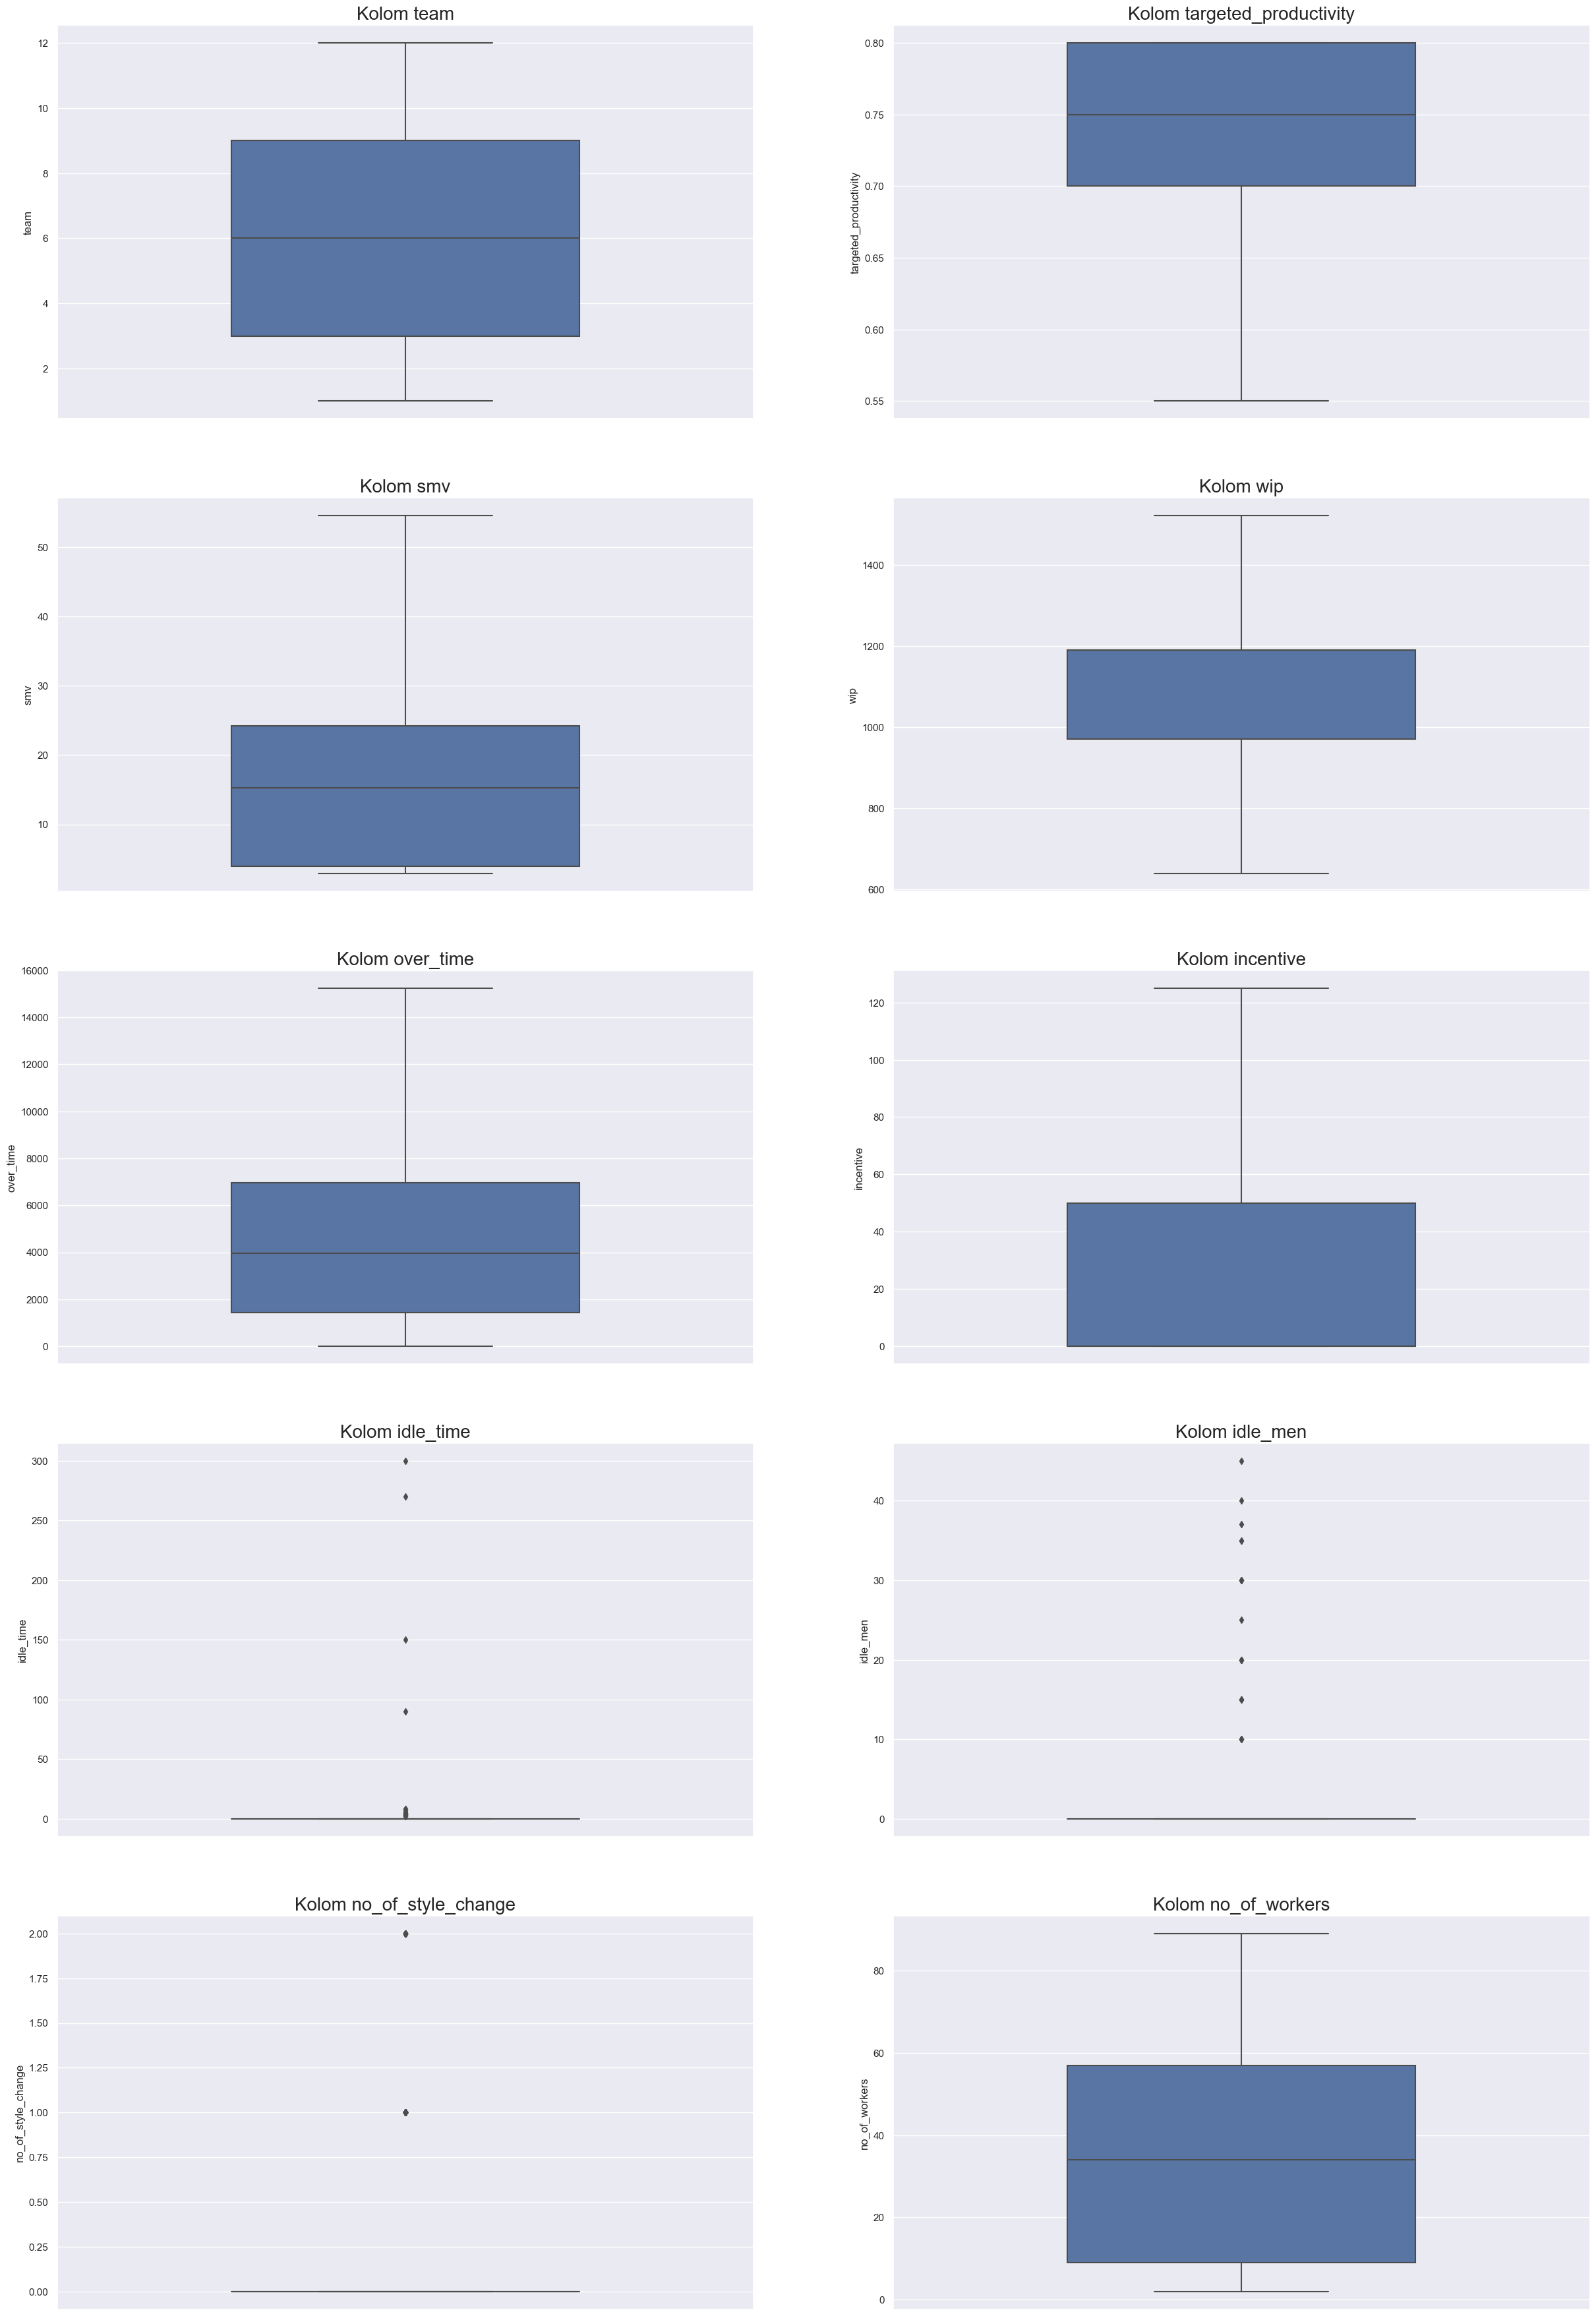

In [30]:
num                = df3[numerik_vars]
n                  = len(num.columns)
rows               = n // 2
cols               = 2
sns.set(font_scale = 1)
fig, ax            = plt.subplots(rows, cols, figsize=(30, 45))

for i in range(rows):
    
    for j in range(cols):
        
        index      = i * cols + j
        if index   < n:
            col    = num.columns[index]
            sns.boxplot(ax=ax[i, j],
                        data=num,
                        y=num[col],
                        width=0.50)
            
            ax[i, j].set_title(f'Kolom {col}', fontdict={'fontsize': 20})

In [31]:
df3.shape

(1197, 14)

### Imbalance Case terhadap variabel target

In [32]:
# Sepertinya tidak cocok dengan menggunakan barchart
# plt.figure(figsize=(8, 6))
# sns.countplot(x='actual_productivity', data=df2, palette='Set2')
# plt.title('Distribusi Actual Productivity')
# plt.xlabel('Actual Productivity')
# plt.ylabel('Jumlah')
# plt.show()

In [33]:
df3['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64

In [34]:
df3['actual_productivity'].unique()

array([0.94072542, 0.8865    , 0.80057049, 0.80038194, 0.800125  ,
       0.75516667, 0.75368348, 0.75309753, 0.75042783, 0.72112696,
       0.71220525, 0.7070459 , 0.70591667, 0.67666667, 0.59305556,
       0.54072917, 0.52118   , 0.43632639, 0.98802469, 0.98788044,
       0.95627083, 0.94527778, 0.90291667, 0.80072531, 0.80032294,
       0.80031864, 0.80023729, 0.80014865, 0.78729969, 0.78244792,
       0.75024303, 0.7018125 , 0.70013404, 0.69996522, 0.62833333,
       0.6253125 , 0.99138889, 0.93164583, 0.91522917, 0.87971448,
       0.86167901, 0.85056949, 0.85043644, 0.85034513, 0.80059806,
       0.80023784, 0.8000302 , 0.79210417, 0.75922839, 0.75034846,
       0.68270833, 0.66760417, 0.60343218, 0.34583333, 0.96105903,
       0.93951389, 0.89366319, 0.87539062, 0.82083333, 0.80441667,
       0.80068437, 0.80025096, 0.80024601, 0.80007652, 0.763375  ,
       0.75927083, 0.7504    , 0.66458333, 0.60002874, 0.96678135,
       0.93649621, 0.89916667, 0.88868687, 0.85814394, 0.85050

Variabel target merupakan variabel kontinyu sehingga akan sangat cocok untuk diterapkan regresi yaitu tugas prediksi.

### Exploratory Data Analysis
#### Analisis Univariate
Melakukan analisis satu variabel independen mengenai pengaruhnya terhadap satu variabel dependen. Sehingga dapat mengetahui korelasi atau hubungannya dari kedua variabel tersebut.

In [35]:
df2.head(5)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [36]:
objek_vars

['quarter', 'department', 'day']

In [37]:
numerik_vars2 = [
                 'targeted_productivity',
                 'smv',
                 'wip',
                 'over_time',
                 'incentive',
                 'idle_time',
                 'idle_men',
                 'no_of_style_change',
                 'no_of_workers']

In [38]:
df3

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


### EDA for Numerical Variabel/Fitur
- Variabel target `actual_productivity` kita jadikan sebagai variabel y atau vertikal pada visualisasi dibawah ini, dikarenakan variabel tersebut merupakan kontinyu.

In [39]:
def scatter_plot(df, numerik_vars, target_var):
    num               = df[numerik_vars]
    n                 = len(num.columns)
    rows              = n // 2 + n % 2
    cols              = 2
    sns.set(font_scale=1)
    fig, ax           = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):
        
        for j in range(cols):
            index     = i * cols + j
            
            if index  < n:
                
                col   = num.columns[index]
                sns.scatterplot(ax=ax[i, j],
                                data=df,
                                x=col,
                                y=target_var)
                
                ax[i, j].set_title(f'Hubungan antara {col} terhadap actual_productivity', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel('actual_productivity')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

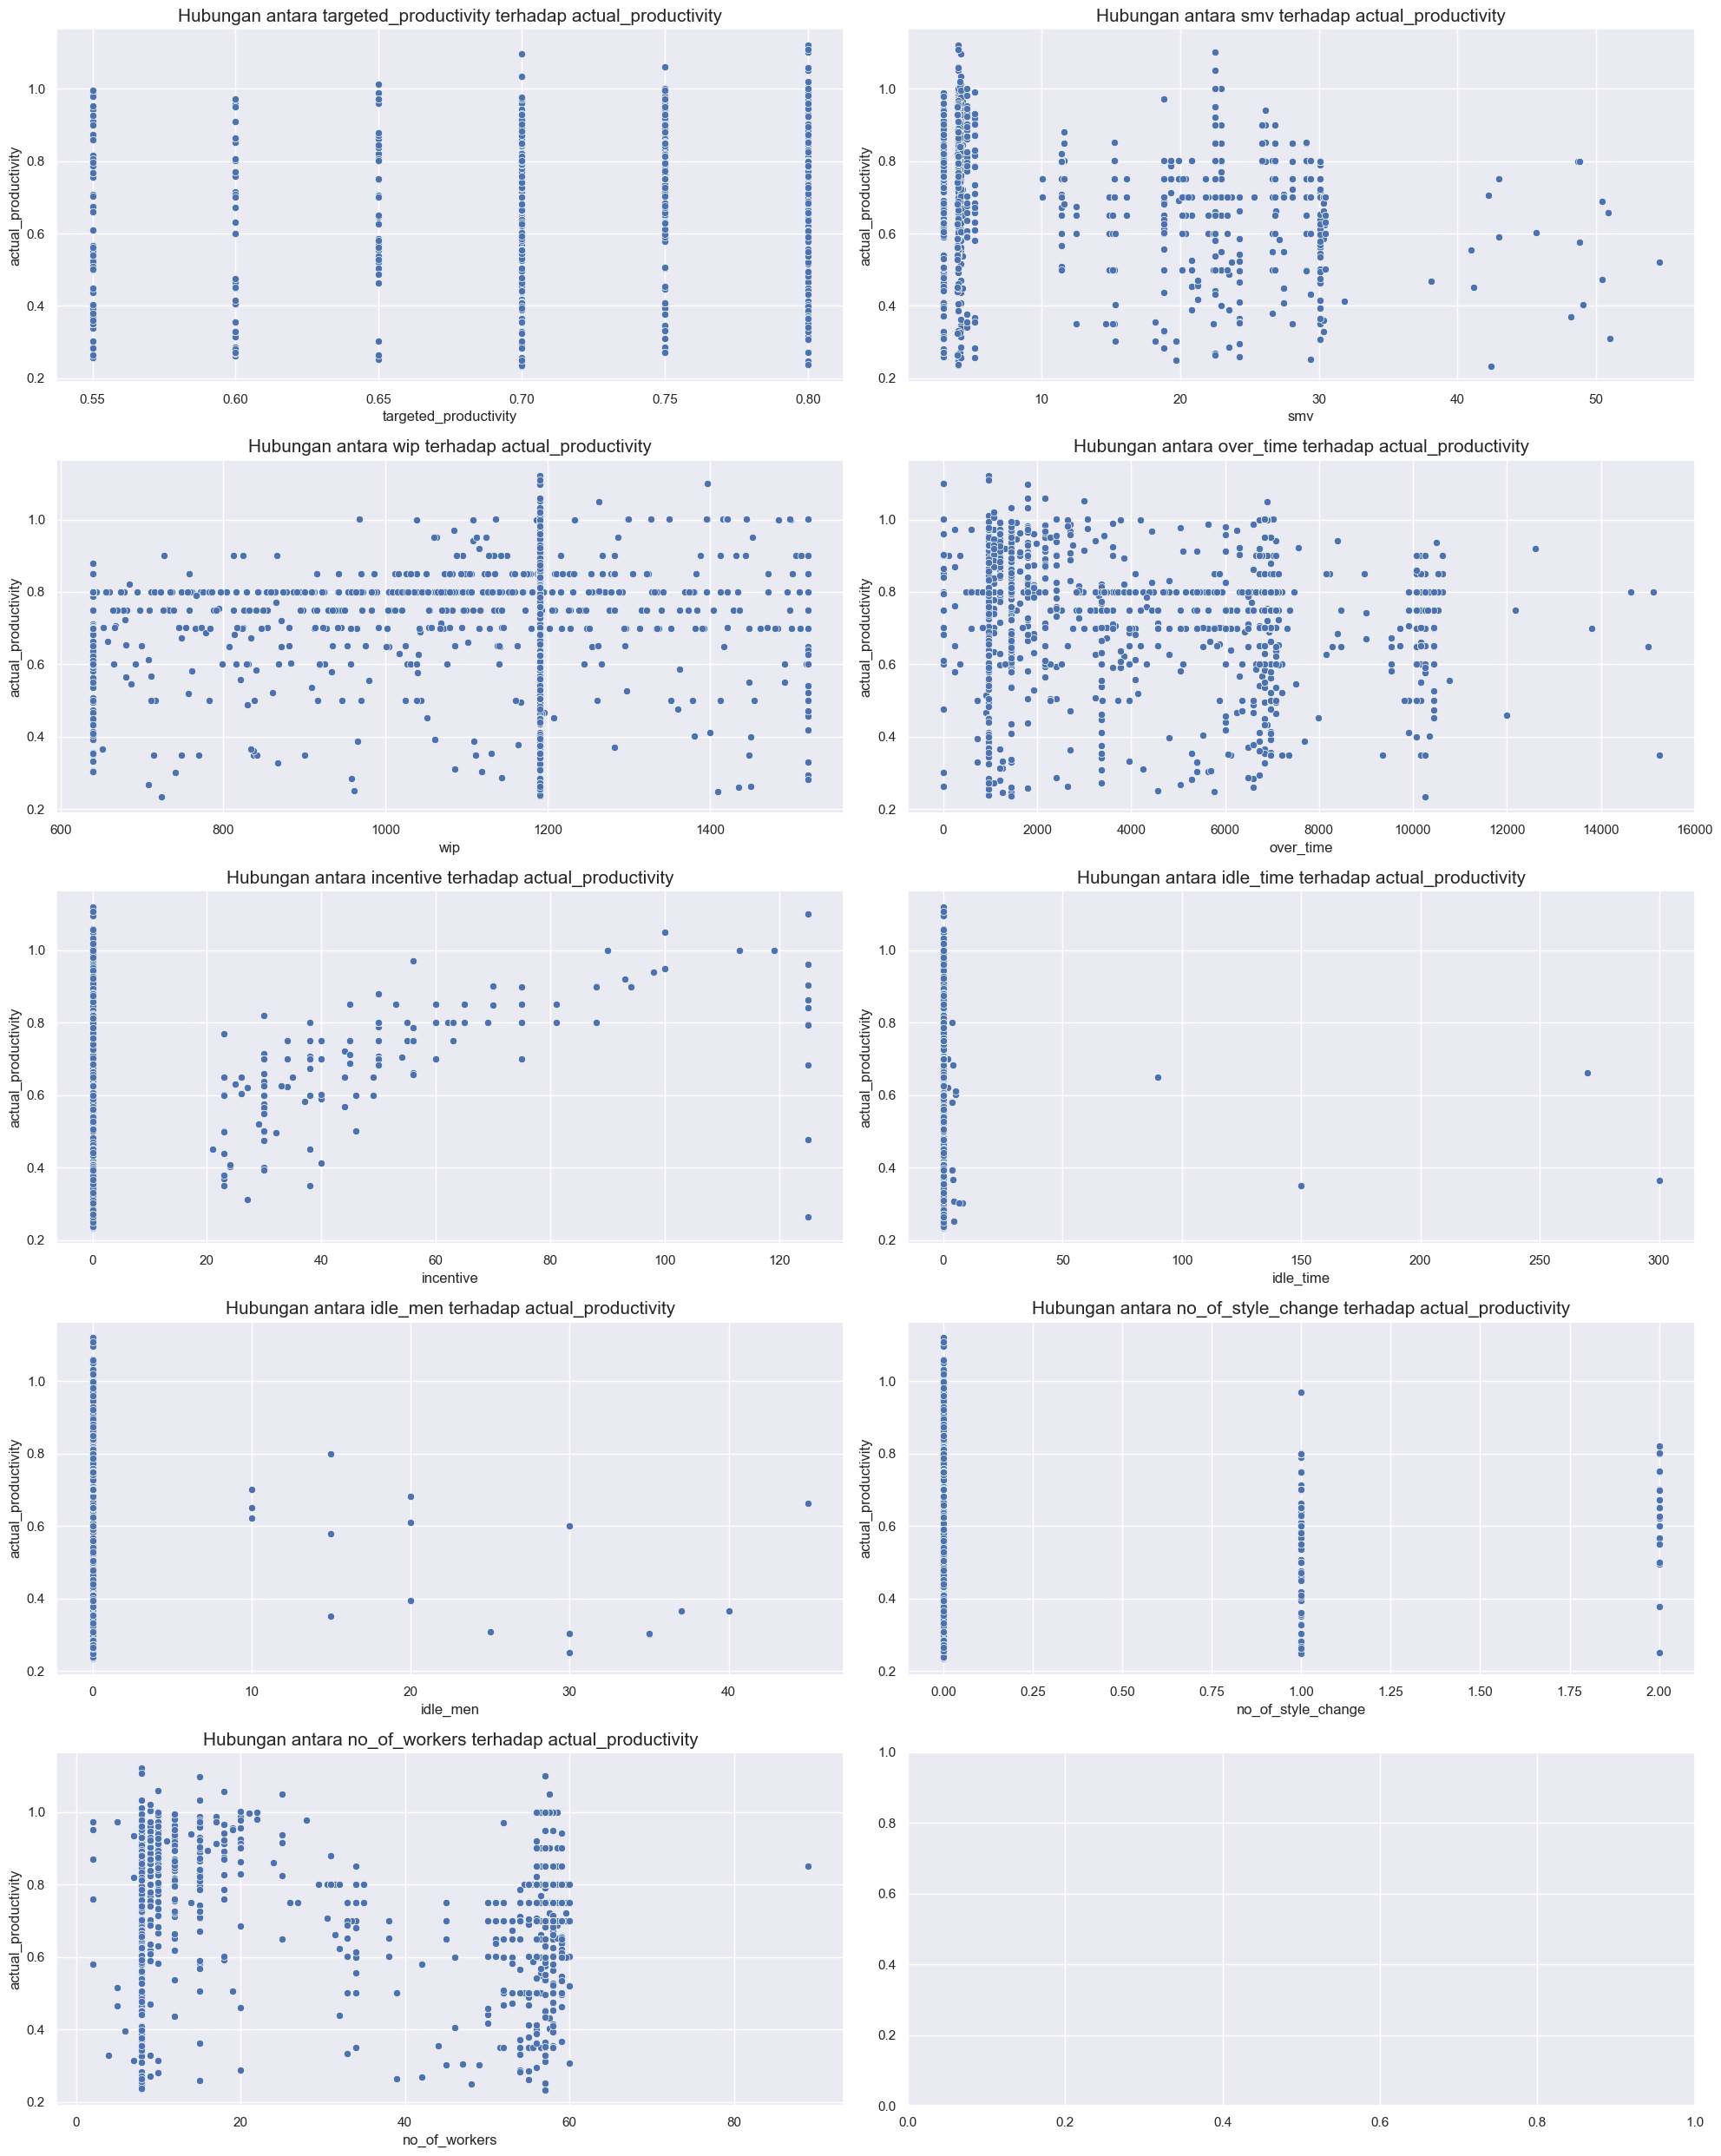

In [40]:
scatter_plot(df3, numerik_vars2, 'actual_productivity')

- Persebaran data pada `targeted_productivity` memiliki persebaran paling padat pada nilai 0.80. Hal ini berarti ketika target produktivitas 0.88 itu cukup banyak dicapai oleh produktivitas aktual.
- `smv` itu mengenai banyaknya waktu yang dialokasikan untuk mengerjakan tugas. Data menunjukkan bahwa ketika smv pada rentang 0 - 10 memiliki persebaran produktivitas aktual yang padat sehingga memiliki banyak variasi pada rentang tersebut. Sedangkan ketika pada rentang smv > 35 itu tidak terlalu produktif.
- Data `wip` menunjukkan persebaran yang seragam baik ketika nilai `wip` kecil ataupun tinggi. `Wip` yang lebih tinggi tampaknya berkorelasi dengan sedikit peningkatan produktivitas aktual, tetapi hal ini tidak konsisten.
- Data `over_time` atau waktu lembur menunjukkan bahwa data cenderung beragam. Namun satu hal yang pasti bahwa ketika waktu lembur sedikit maka produktivitas aktual akan semakin tinggi.
- Data `incentive` tersebut memiliki hubungan positif terhadap `actual_productivity`. Karena semakin tinggi insentif yang diberikan, produktivitas aktual cenderung meningkat. Namun juga memiliki persebaran yang padat ketika incentive bernilai 0 (variasi banyak). 
- Data `idle_men` juga memiliki persebaran data yang padat ketika 0 (variasi). Selain itu hubungan antara kedua variabel tersebut memiliki hubungan yang negatif. Ketika jumlah pekerja yang menganggur meningkat, produktivitas cenderung rendah dan tidak mencapai nilai maksimum.
- Data `no_of_workers` memiliki persebaran yang cukup beragam. Namun, terdapat banyak titik dengan produktivitas maksimum (1.0) pada berbagai jumlah pekerja, seperti contohnya pada rentang 0 - 20, namun rentang tersebut masih terlalu luas.
- Data `idle_time` memiliki persebaran data produktivitas aktual yang padat ketika bernilai 0. Sehingga tidak bisa melihat tren data yang ada.
- Begitupun dengan data `no_of_style_change` yang mungkin merupakan data kategorikal.

In [41]:
def bar_plot(df, kategorik_vars, target_var):
    cat          = df[kategorik_vars]
    n            = len(cat.columns)
    rows         = n // 2 + n % 2
    cols         = 2
    sns.set(style="whitegrid", font_scale=1)
    fig, ax      = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):
        
        for j in range(cols):
            
            index    = i * cols + j
            
            if index < n:
                
                col  = cat.columns[index]
                order = df.groupby(col)[target_var].mean().sort_values().index # rata-rata
                
                unique_values = df[col].nunique()
                palette = sns.color_palette("Blues", unique_values)
                
                sns.barplot(ax=ax[i, j],
                            data=df,
                            x=col,
                            y=target_var,
                            order=order,
                            palette=palette)
                
                ax[i, j].set_title(f'Hubungan antara {col} terhadap actual_productivity', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel('actual_productivity')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

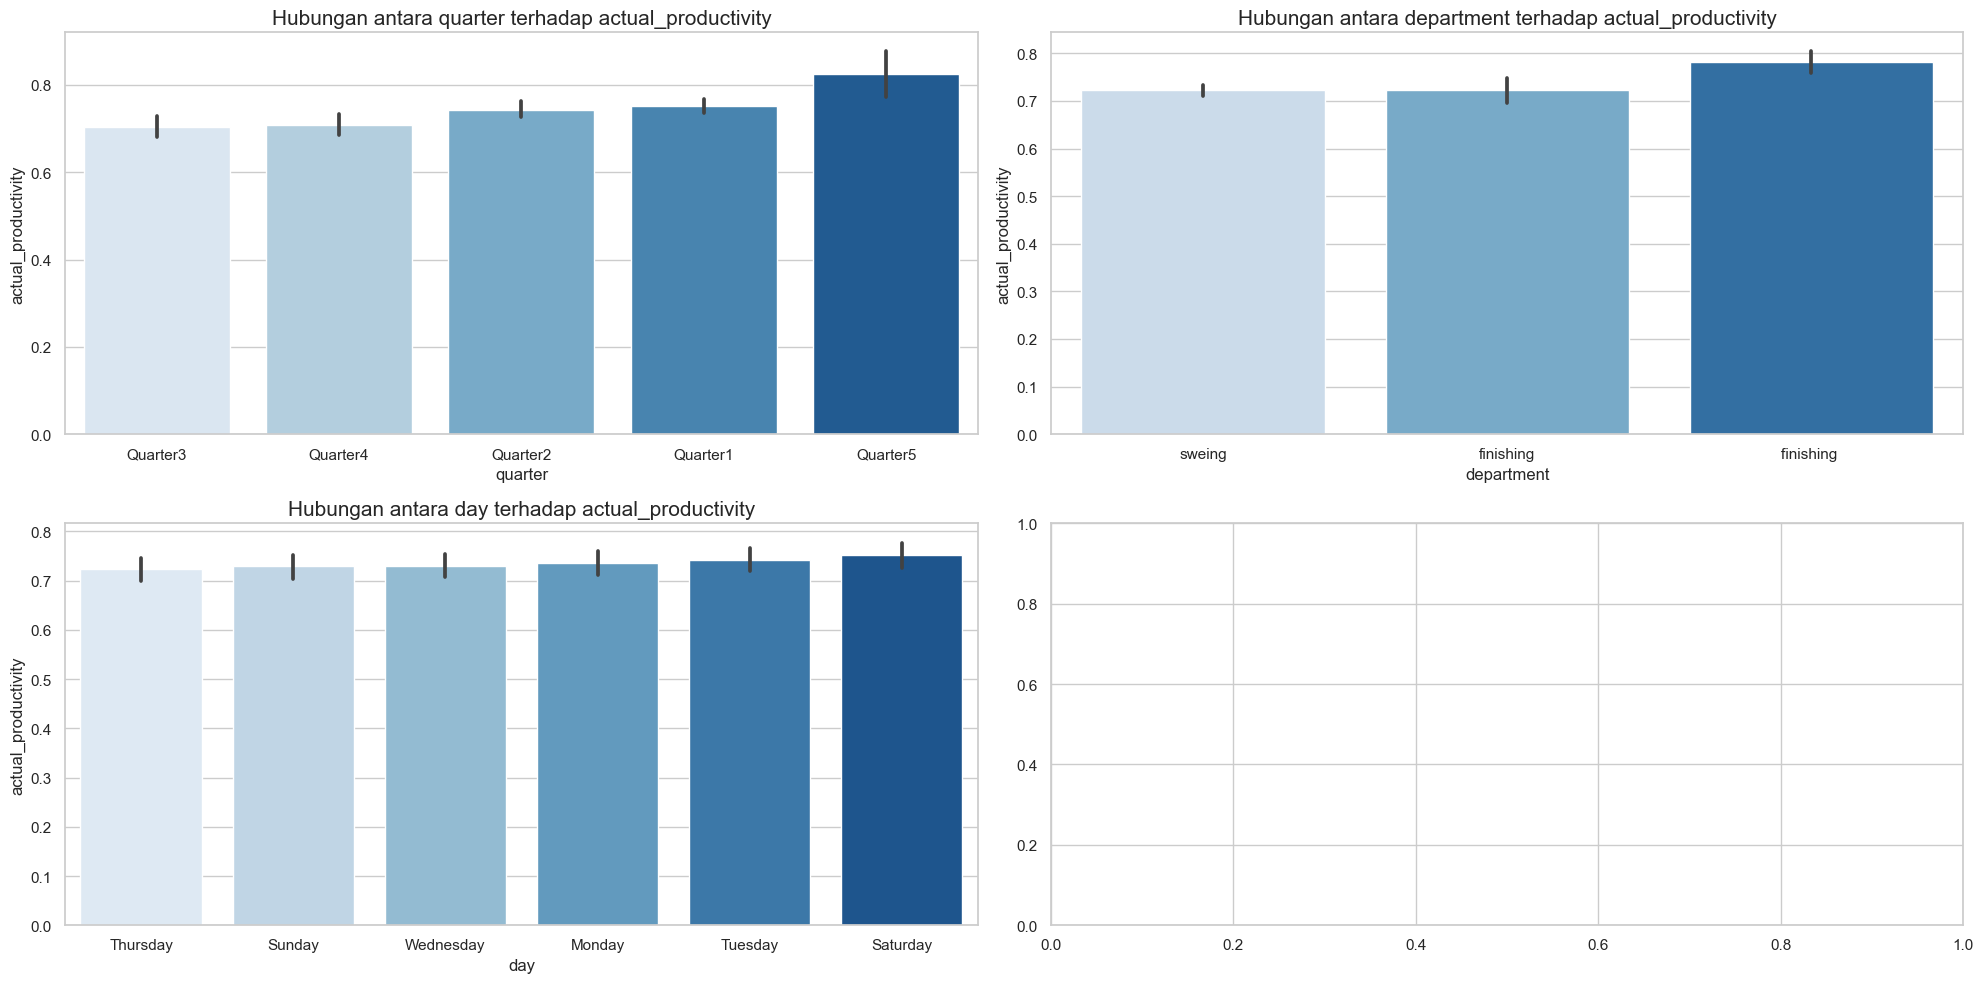

In [42]:
bar_plot(df3, objek_vars, 'actual_productivity')

- Pada Quarter 5 menunjukkan performa karyawan terbaik melalui nilai **`actual_productivity`** lebih tinggi dibandingkan dengan kuartal lainnya. Hal ini menunjukkan ada pengaruh musiman atau strategi manajemen.
- **`Department`** finishing memiliki produktifitas aktual sedikit lebih tinggi dibandingkan dengan departemen sweing. 
- Enam hari kerja **`day`** pada perusahaan gourmet menunjukkan produktifitas aktual yang sama rata.

#### Fitur sementara yang dipilih
- `targeted_productivity`
- `smv`
- `wip`
- `over_time`
- `incentive`
- `no_of_workers`
- `no_of_style_change`

### Feature Engineering
- Encoding
- Scalling

In [43]:
df3.head(5)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


#### Encoding kategorik variabel intoo numerik

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

Variabel **`team`** perlu didiskusikan lebih lanjut. Karena terlihat seperti nomor atau urutan setiap team pada perusahaan. Jadi agak confused tentang penerapan encoding.

In [45]:
# 'Day'
one_hot_day                 = OneHotEncoder(sparse_output=False)
day_reshaped                = df3['day'].values.reshape(-1, 1)
day_one_hot                 = one_hot_day.fit_transform(day_reshaped)
day_encoded                 = pd.DataFrame(day_one_hot, columns=one_hot_day.get_feature_names_out(['day']))
df3_day                     = pd.concat([df3.drop(columns=['day']), day_encoded], axis=1)

# 'Quarter'
ordinal                     = OrdinalEncoder()
df3_day['quarter_encod']    = ordinal.fit_transform(df3_day[['quarter']])

# 'Department'
one_hot_department          = OneHotEncoder(sparse_output=False)
department_reshaped         = df3_day['department'].values.reshape(-1, 1)
department_one_hot          = one_hot_department.fit_transform(department_reshaped)
department_encoded          = pd.DataFrame(department_one_hot, columns=one_hot_department.get_feature_names_out(['department']))
df3_day                     = pd.concat([df3_day.drop(columns=['department']), department_encoded], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df3_day.drop(columns=['quarter'], inplace=True)

In [47]:
df3_day.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'quarter_encod',
       'department_finishing', 'department_finishing ', 'department_sweing'],
      dtype='object')

In [48]:
df3_day['quarter_encod'].value_counts()

quarter_encod
0.0    360
1.0    335
3.0    248
2.0    210
4.0     44
Name: count, dtype: int64

In [49]:
df3_day.dtypes

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
day_Monday               float64
day_Saturday             float64
day_Sunday               float64
day_Thursday             float64
day_Tuesday              float64
day_Wednesday            float64
quarter_encod            float64
department_finishing     float64
department_finishing     float64
department_sweing        float64
dtype: object

In [50]:
df3_day.shape

(1197, 21)

#### Scaling

- Cek distribusi data

In [51]:
df3_day

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing
0,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1193,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1194,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1195,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [52]:
distribusi = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

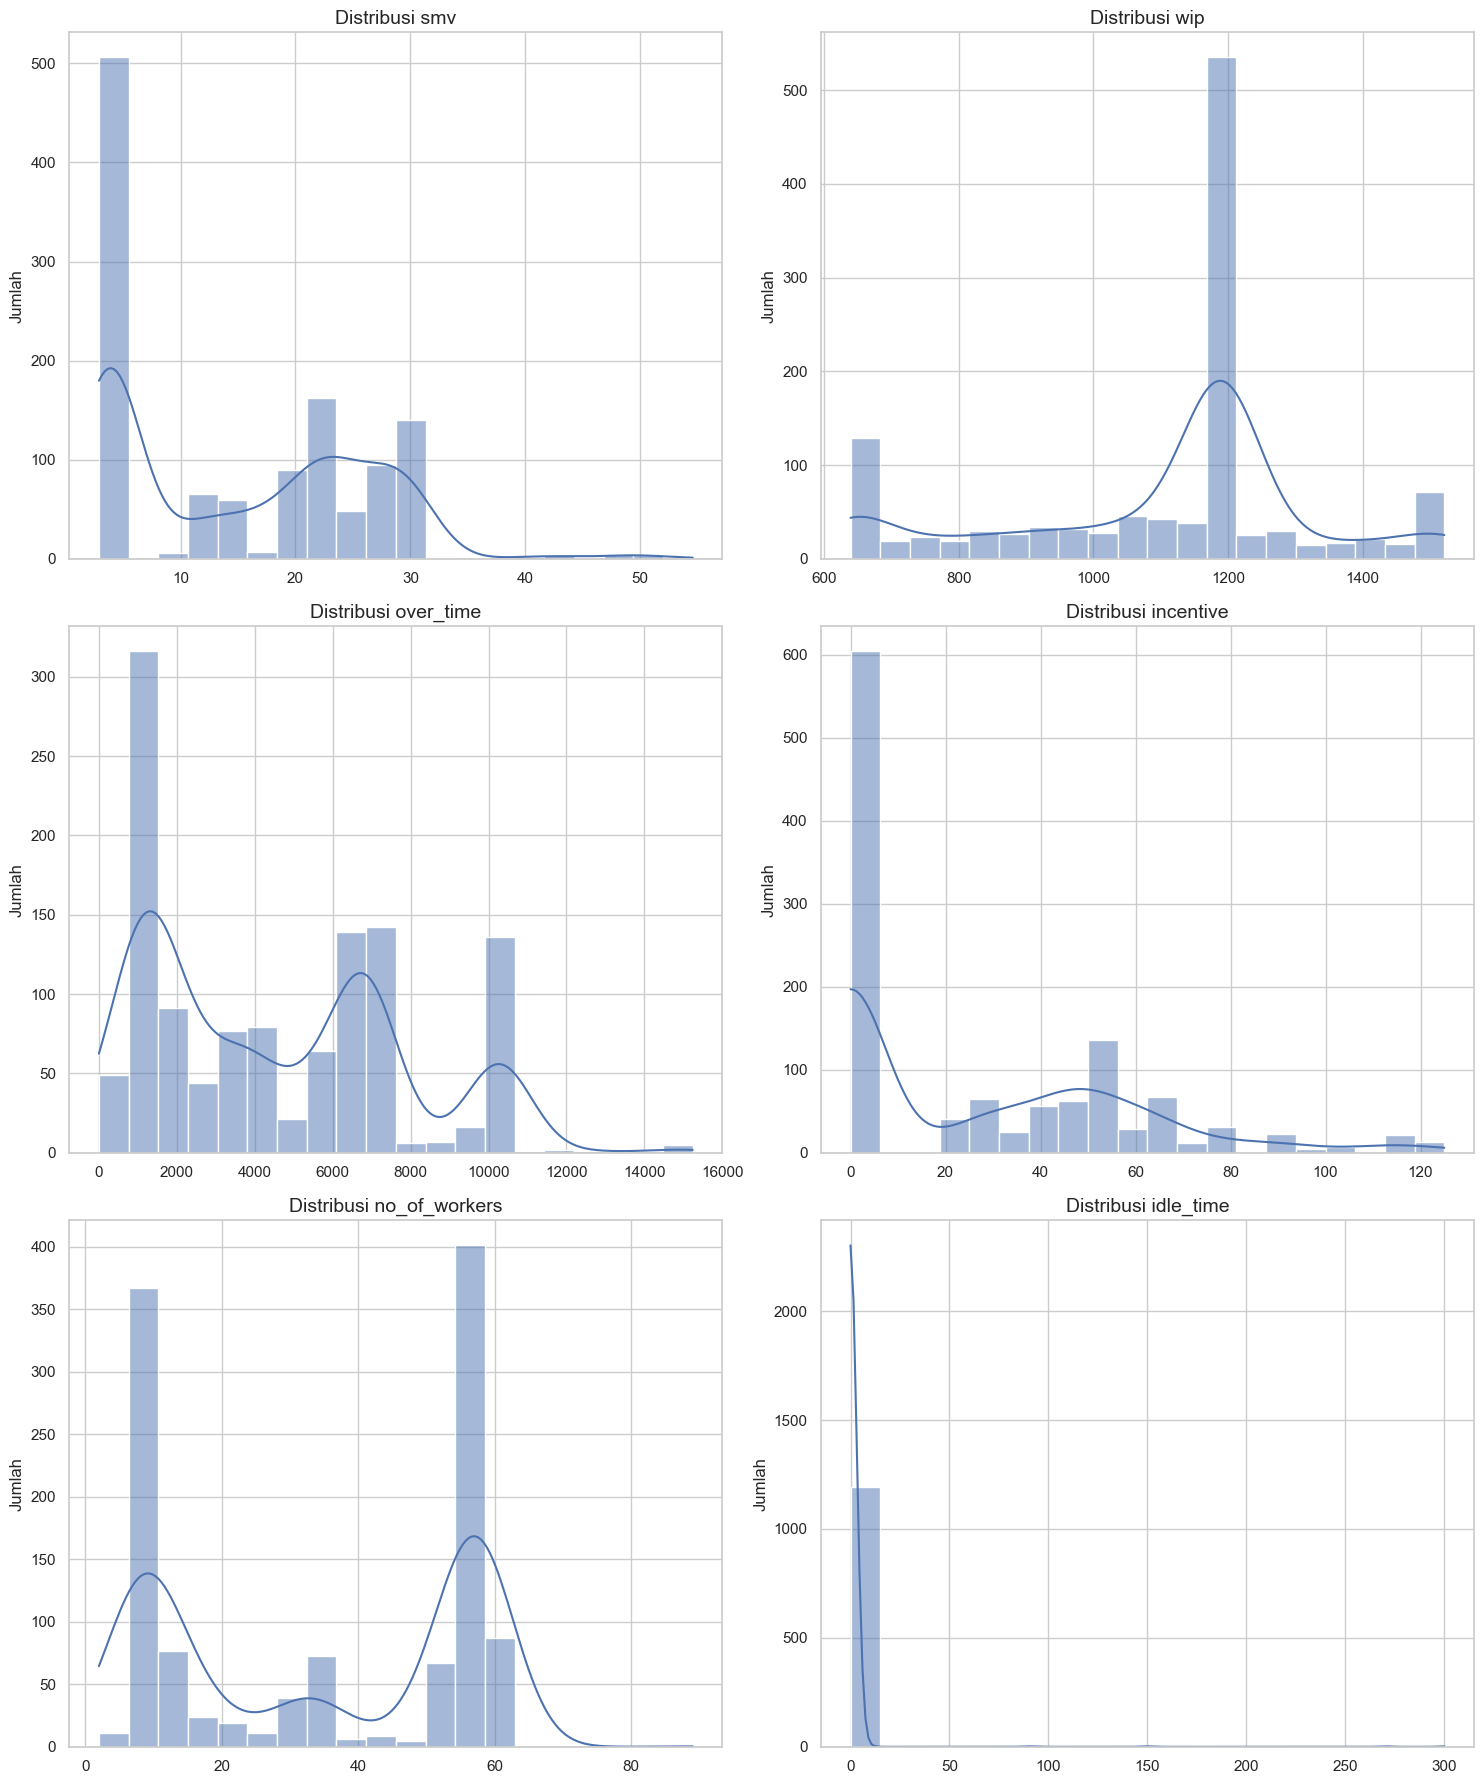

In [53]:
rows    = (len(distribusi) + 1) // 2
cols    = 2
fig, ax = plt.subplots(rows,
                       cols,
                       figsize=(15, 6 * rows))

for i, var in enumerate(distribusi):
    
    row = i // cols
    col = i % cols
    sns.histplot(df3[var], ax=ax[row, col], kde=True, bins=20)
    ax[row, col].set_title(f'Distribusi {var}', fontsize=14)
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()

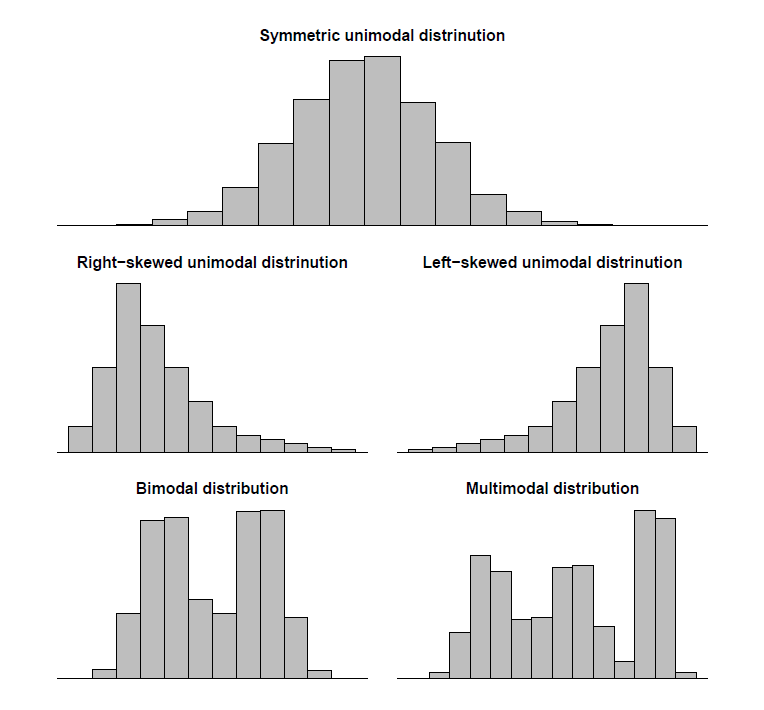
- `smv` = distribusi sedikit skew
- `wip` = distribusi kurtosis
- `over_time` = distribusi normal
- `incentive` = distribusi skewness ke kanan
- `no_of_workers` = distribusi normal / Bimodial
- `idle_time` = distribusi skew

In [54]:
df3_day

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing
0,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1193,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1194,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1195,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [55]:
X = df3_day.drop(['actual_productivity'], axis=1)
y = df3_day.actual_productivity

In [56]:
X.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'quarter_encod', 'department_finishing',
       'department_finishing ', 'department_sweing'],
      dtype='object')

1. `smv` = min-max scaling
2. `wip` = robust scaling
3. `over_time` = min-max scaling
4. `incentive` = log transformation
5. `no_of_workers` = min-max scaling

In [57]:
smv_scaler               = MinMaxScaler()
wip_scaler               = RobustScaler()
over_time_scaler         = MinMaxScaler()
incentive_scaler         = np.log1p
no_of_workers_scaler     = MinMaxScaler()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
X_skala                  = X.copy()

In [59]:
X_skala['smv']           = smv_scaler.fit_transform(X[['smv']])

In [60]:
X_skala['wip']           = wip_scaler.fit_transform(X[['wip']])

In [61]:
X_skala['over_time']     = over_time_scaler.fit_transform(X[['over_time']])

In [62]:
X_skala['incentive']     = incentive_scaler(X['incentive'])

In [63]:
X_skala['idle_time']     = incentive_scaler(X['idle_time'])

In [64]:
X_skala['no_of_workers'] = no_of_workers_scaler.fit_transform(X[['no_of_workers']])

In [65]:
X_skala

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing
0,8,0.80,0.450252,-0.374053,0.464567,4.595120,0.0,0,0,0.655172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.75,0.020132,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,0.80,0.445219,-0.092831,0.125984,3.931826,0.0,0,0,0.620690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,0.000000,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1193,8,0.70,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1194,7,0.65,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1195,9,0.75,0.000000,0.000000,0.118110,0.000000,0.0,0,0,0.149425,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [66]:
X_skala.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.736842,0.235427,-0.408341,0.299117,1.943682,0.036899,0.369256,0.150376,0.374826,0.166249,0.156224,0.169591,0.166249,0.167920,0.173768,1.399332,0.208020,0.214703,0.577277
std,3.463963,0.075515,0.211832,1.047682,0.216918,1.982939,0.351984,3.268987,0.427848,0.255146,0.372460,0.363219,0.375430,0.372460,0.373951,0.379068,1.215535,0.406061,0.410788,0.494199
min,1.000000,0.550000,0.000000,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.700000,0.020132,-1.000000,0.094488,0.000000,0.000000,0.000000,0.000000,0.080460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.750000,0.239257,0.000000,0.259843,0.000000,0.000000,0.000000,0.000000,0.367816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,9.000000,0.800000,0.413473,0.000000,0.456693,3.931826,0.000000,0.000000,0.000000,0.632184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,12.000000,0.800000,1.000000,1.500000,1.000000,4.836282,5.707110,45.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [67]:
df_3 = pd.concat([X_skala, y], axis=1)

<IPython.core.display.Javascript object>

In [68]:
df_3

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_encod,department_finishing,department_finishing,department_sweing,actual_productivity
0,8,0.80,0.450252,-0.374053,0.464567,4.595120,0.0,0,0,0.655172,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.940725
1,1,0.75,0.020132,0.000000,0.062992,0.000000,0.0,0,0,0.068966,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.886500
2,11,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800570
3,12,0.80,0.164731,-1.009072,0.240157,3.931826,0.0,0,0,0.327586,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800570
4,6,0.80,0.445219,-0.092831,0.125984,3.931826,0.0,0,0,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,0.000000,0.000000,0.062992,0.000000,0.0,0,0,0.068966,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.628333
1193,8,0.70,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.625625
1194,7,0.65,0.019357,0.000000,0.062992,0.000000,0.0,0,0,0.068966,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.625625
1195,9,0.75,0.000000,0.000000,0.118110,0.000000,0.0,0,0,0.149425,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.505889


In [69]:
df_3.to_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/df2.csv', index=False)

In [70]:
X_skala.to_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/X_skala2.csv', index=False)

In [71]:
y.to_csv('C:/Users/ASUS/kode/Projek/9. Produktifitas_Buruh/y2.csv', index=False)